# Detailed peakbagging
The detailed peakbagging stage is meant to remove the constraints from the various models we use to define the frequency pattern in the mode ID stage. 

It's possible to run the peakbag stage without doing the mode ID stage first, so that you can supply your own solutions if the mode ID is wonky. It's even possible to run it with just the angular degree and frequencies as inputs, but performs a lot better if you pass it the mode heights and widths too.

Let's start by loading in the spectrum.

**Note:** You may want to use the full resolution spectrum for the detailed peakbagging. It will take longer but should give you the highest precision on your frequencies.

In [1]:
from pbjam import IO

tgt = 'KIC5184732'

psd = IO.psd(tgt, lk_kwargs={'exptime': 60, 'mission':'Kepler', 'author':'Kepler'})
 
psd()

f = psd.freq

s = psd.powerdensity

The `peakbag` module requires some inputs in the form of mode frequenices, heights and widths. These can be supplied manually, but we'll use the `modeID` to generate them for us. You should read the mode ID notebook for more details. 

**Note:** As in the mode ID notebook we use a downsampled version of the spectrum since the full resolution isn't necessary for mode ID on this star.

In [2]:
from pbjam.modeID import modeID

obs = {'teff' : (5846, 80), # K
       'bp_rp': (0.819174, 0.05),
       'numax': (2089.3, 20.0), # muHz
       'dnu'  : (95.545, 0.5)} # muHz
 
downSampling = 10

M = modeID(f[::downSampling], s[::downSampling], obs, N_p=7)

M()

modeID_result = M.result

14000it [03:30, 66.50it/s, +600 | bound: 149 | nc: 1 | ncall: 402184 | eff(%):  3.636 | loglstar:   -inf < -7098.590 <    inf | logz: -7119.615 +/-  0.171 | dlogz:  0.000 >  0.100]


Input Teff=5846K and dnu=95.545muHz suggests the appropriate l=1 model is: ms


1445it [00:06, 237.29it/s, +150 | bound: 41 | nc: 1 | ncall: 26694 | eff(%):  6.009 | loglstar:   -inf < -5834.160 <    inf | logz: -5841.417 +/-  0.200 | dlogz:  0.001 >  0.100]
4212it [00:16, 258.88it/s, +150 | bound: 161 | nc: 1 | ncall: 90335 | eff(%):  4.837 | loglstar:   -inf < -5834.154 <    inf | logz: -5841.417 +/-  0.189 | dlogz:  0.000 >  0.000]


We can now supply the mode ID solution to the `peakbag` module. Again, these can be supplied manually if you disagree with the mode ID. Furthermore, they can be any combination of angular degrees that you can find. If you supply only $\ell=2,0$ mode pairs, then PBjam will mask out the regions in between the pairs so reduce the effect of the $\ell=1$ mode power. This behavior is then identical to that of the first release of PBjam.

At this stage we have the choice of two samplers, either `emcee` or `Dynesty`. `emcee` is likely the best choice for main-sequence or sub-giant stars since the solutions are not likely to be multimodal. However, for red giants, the `Dynesty` sampler may work better. In this case since we're looking at a main-sequence star we'll just use `emcee`.

In [3]:
from pbjam.peakbagging import peakbag

pb = peakbag(f, s, 
             ell=modeID_result['ell'], 
             freq=modeID_result['summary']['freq'], 
             height=modeID_result['summary']['height'], 
             width=modeID_result['summary']['width'], 
             samplerType='emcee')

Using emcee to sample.


We can now simply call the `pb` class instance to start the sampling.

In [4]:
pb_result = pb()

Peakbagging slice 1/1
Burning in sampler
Convergence >> 1: 20.0
Convergence >> 1: 7.9
Convergence >> 1: 3.7
Convergence >> 1: 2.1
Convergence >> 1: 1.6
Convergence >> 1: 0.9
Sampling posterior.
Time taken 40.9 minutes


As with the mode ID class we can use there are several plotting functions available with the peakbag class.

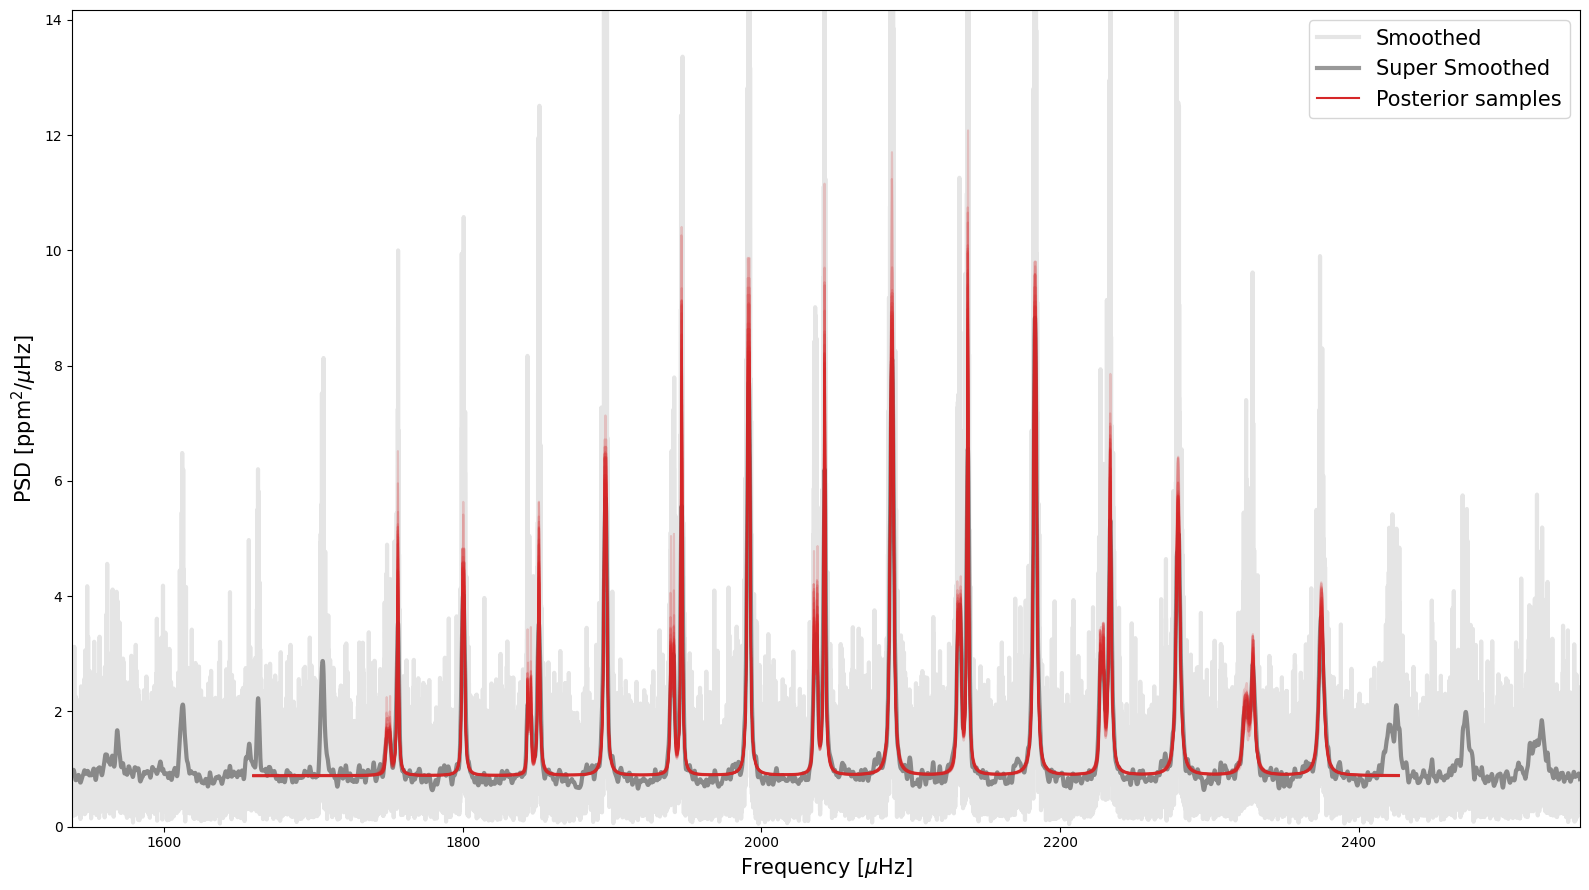

In [5]:
pb.spectrum();

And the results are stored in the `result` attribute.

In [6]:
pb.result

{'ell': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.,
        2., 2., 2., 2.]),
 'enn': array([], dtype=float64),
 'emm': array([], dtype=float64),
 'zeta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'summary': {'freq': array([[1.80051325e+03, 1.89561495e+03, 1.99151765e+03, 2.08744830e+03,
          2.18331039e+03, 2.27905716e+03, 2.37501062e+03, 1.75667208e+03,
          1.85109350e+03, 1.94664732e+03, 2.04237008e+03, 2.13821501e+03,
          2.23357230e+03, 2.32915235e+03, 1.75016216e+03, 1.84463450e+03,
          1.94039484e+03, 2.03636428e+03, 2.13241863e+03, 2.22800926e+03,
          2.32422880e+03],
         [8.40673891e-02, 7.50538996e-02, 6.56138458e-02, 7.36483197e-02,
          7.32410193e-02, 9.58037752e-02, 1.35408529e-01, 7.67754829e-02,
          8.92006983e-02, 5.92298605e-02, 6.18582392e-02, 6.39755237e-02,
          8.65581199e-02, 2.19227929e-01, 2.42418023e-01, 9.10180782e-02,
 